# Spring 2025 Final Project

You are tasked to identify employees who are expected to leave from the company. You are given the past data but unfortunately it does not have the labels.

But John who has been here for a long long time can help you out. You can ask him for a limited number of times.

__NOTE:__ Do NOT use this notebook as your project template. You can copy & paste items such as the class below into your notebook.


__Data:__

`https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv`


Create your solution as a notebook and save your final model.

In [ ]:
import pandas as pd

class SME():

    def __init__(self):
        self.asked = 0
        self.df = self.get()

    def get(self):
        X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv')
        y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_y.csv')

        X_train['Left'] = y_train
        return X_train

    def ask(self, valuedict):
        self.asked += 1
        #  print(self.asked)

        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")

        arr = []
        for prop in valuedict:
            val = valuedict[prop]

            if val is None:
                continue

            val = f"'{val}'" if isinstance(val,str) else val
            # print(prop, val)
            arr.append(f'{prop} == {val}')

            query = ' and '.join(arr)
        result = self.df.query(query)

        if len(result) == 0:
            raise Exception("I don't know")

        return (int)(result['Left'].mean())

In [ ]:
sme = SME()

In [ ]:
#Function for generating label
def get_labels(record_id):
  return sme.ask({'RecordId': record_id})

You can ask the expert for the label.

If he doesn't know the answer, he will freak out so ask only from the training set
but do not ask him for every data point

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
finaldata = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/employee_departure_dataset_X.csv'

In [ ]:
df = pd.read_csv(finaldata)

In [ ]:
df.head(5)

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview
0,100,1,>30miles,7,91,4,14,3,8,1,...,2,3,2,9,5,5,72K,73K,4.0,4.0
1,101,0,~10miles,10,52,5,9,2,10,0,...,1,3,4,8,1,1,62K,64K,4.0,4.0
2,102,0,~10miles,10,80,3,13,3,16,0,...,3,7,2,7,8,5,73K,74K,4.0,2.0
3,103,0,~15miles,5,6,3,15,5,16,0,...,4,6,9,5,5,1,63K,64K,5.0,5.0
4,104,1,~10miles,10,3,2,13,3,18,0,...,3,3,4,4,4,2,60K,64K,4.0,4.0


In [ ]:
df.tail(5)

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,ProjectComplexity,WorkSatisfactionScore,JobEngagementScore,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview
499995,500095,1,>30miles,9,80,1,10,3,14,0,...,2,4,7,5,1,2,61K,63K,4.0,5.0
499996,500096,0,~20miles,7,0,3,2,5,4,1,...,3,1,6,6,5,2,60K,62K,5.0,5.0
499997,500097,0,~20miles,10,8,3,13,3,13,1,...,3,4,2,8,4,6,65K,68K,5.0,2.0
499998,500098,0,~15miles,10,51,3,7,3,5,0,...,2,6,2,7,6,2,53K,54K,5.0,5.0
499999,500099,1,~15miles,8,74,4,14,1,4,0,...,3,3,3,4,4,7,87K,90K,4.0,4.0


In [ ]:
df.dtypes

,0
RecordId,int64
Gender,int64
Distance,object
YearsWorked,int64
TrainingHours,int64
WorkLifeBalance,int64
NumOfProjects,int64
JobInvolvement,int64
TeamSize,int64
MentorshipReceived,int64


In [ ]:
df.isnull().sum()

,0
RecordId,0
Gender,0
Distance,508
YearsWorked,0
TrainingHours,0
WorkLifeBalance,0
NumOfProjects,0
JobInvolvement,0
TeamSize,0
MentorshipReceived,0


In [ ]:
df.shape

(500000, 27)

In [ ]:
#Replace null values with mode
for col in ['Distance', 'SelfReview', 'SupervisorReview']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-59-19dd9b5615e5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### We cleaned the data to handle the missing values, which may cause issues, and also to ensure data consistency during model training and evaluation.

# **Feature Engineering**

In [ ]:
#Salary and Previous Salary columns - convert string to num (salary has 67K in values)
df['PreviousSalary'] = df['PreviousSalary'].astype(str).str.replace('K', '').astype(float)
df['Salary'] = df['Salary'].astype(str).str.replace('K', '').astype(float)

#Creating SalaryDifference column
df['SalaryDiff'] = df['Salary'] - df['PreviousSalary']

#calculating workload stress based upon no of project and its complexity
df['WorkStress'] = df['ProjectComplexity'] * df['NumOfProjects']

#active and well being score
df['ActiveIndex'] = df['PhysicalActivityScore'] + df['MentalWellbeingScore']

df.head(5)

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,PhysicalActivityScore,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview,SalaryDiff,WorkStress,ActiveIndex
0,100,1,>30miles,7,91,4,14,3,8,1,...,9,5,5,72.0,73.0,4.0,4.0,1.0,28,14
1,101,0,~10miles,10,52,5,9,2,10,0,...,8,1,1,62.0,64.0,4.0,4.0,2.0,9,9
2,102,0,~10miles,10,80,3,13,3,16,0,...,7,8,5,73.0,74.0,4.0,2.0,1.0,39,15
3,103,0,~15miles,5,6,3,15,5,16,0,...,5,5,1,63.0,64.0,5.0,5.0,1.0,60,10
4,104,1,~10miles,10,3,2,13,3,18,0,...,4,4,2,60.0,64.0,4.0,4.0,4.0,39,8


# **Visualizations**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-15-111d2cfd1084>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='DepartmentCode', y='Salary', palette='viridis')


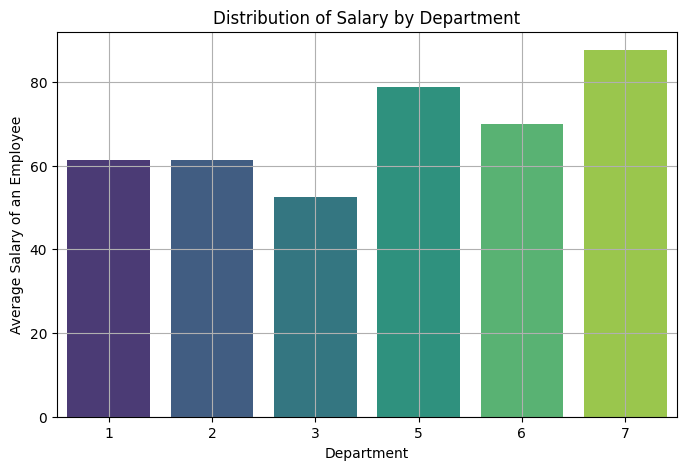

In [ ]:
#Average salary distribution based on the department
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='DepartmentCode', y='Salary', palette='viridis')
plt.title('Distribution of Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary of an Employee')
plt.grid(True)
plt.show()

<ipython-input-16-ecc1a2380f6f>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:gray'` for the same effect.

  sns.stripplot(data=df, x='DepartmentCode', y='Salary', hue='Gender',


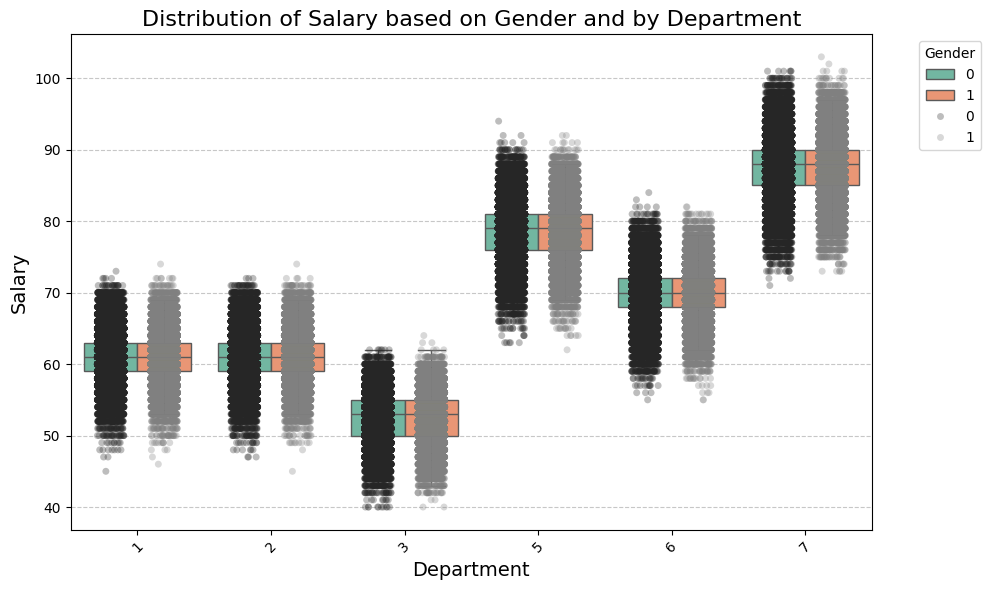

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DepartmentCode', y='Salary', hue='Gender', palette='Set2', showfliers=False)
sns.stripplot(data=df, x='DepartmentCode', y='Salary', hue='Gender',
              dodge=True, marker='o', alpha=0.3, color='gray', jitter=0.2)

plt.title('Distribution of Salary based on Gender and by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

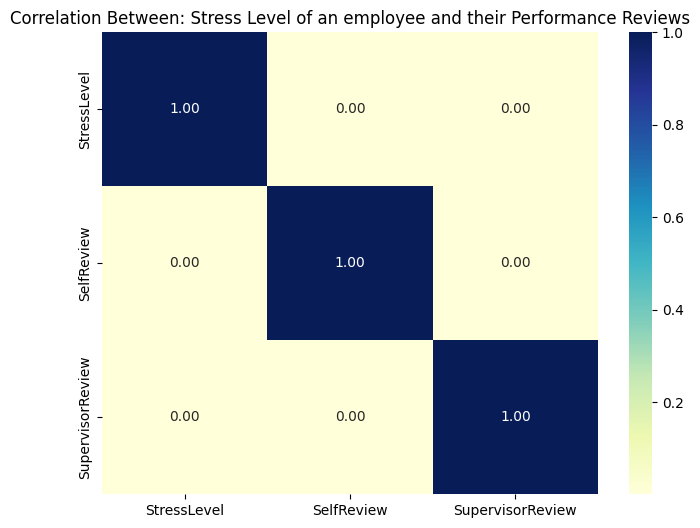

In [ ]:
plt.figure(figsize=(8, 6))
correlation_data = df[['StressLevel', 'SelfReview', 'SupervisorReview']].corr()
sns.heatmap(correlation_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Between: Stress Level of an employee and their Performance Reviews')
plt.show()

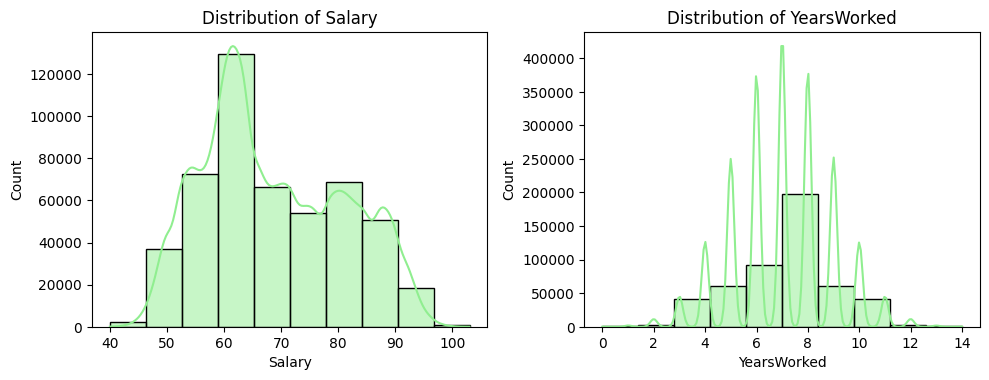

In [ ]:
#Graphs to know the stresslevel and yearsworked of an employee
features = ['Salary','YearsWorked']
plt.figure(figsize=(10, 7))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=10, color='lightgreen')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

<ipython-input-19-83fa4504a17d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


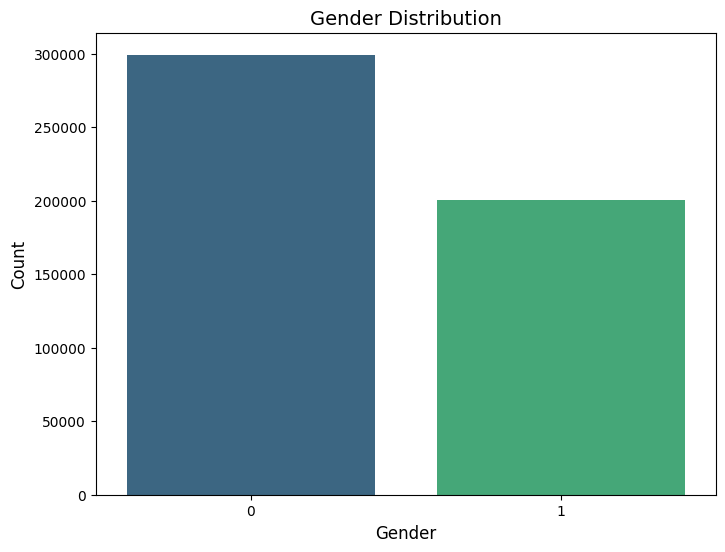

In [ ]:
# show gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# **Pipeline Creation**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler, OneHotEncoder

In [ ]:
#Divide into numerical and Categorical
NUM = ['JobEngagementScore', 'MentalWellbeingScore', 'Salary', 'YearsWorked', 'NumOfProjects','WorkSatisfactionScore','SalaryDiff','WorkStress','ActiveIndex',
       'Gender', 'MentorshipReceived', 'SkillDevelopmentCourses', 'DepartmentCode', 'WorkLifeBalance', 'JobInvolvement','TechSkillLevel', 'StressLevel', 'ProjectComplexity', 'SelfReview', 'SupervisorReview']
CAT = ['Distance']
print("Feature selection numerical -",  NUM)
print('Feature selection numerical -',  CAT)

Feature selection numerical - ['JobEngagementScore', 'MentalWellbeingScore', 'Salary', 'YearsWorked', 'NumOfProjects', 'WorkSatisfactionScore', 'SalaryDiff', 'WorkStress', 'ActiveIndex', 'Gender', 'MentorshipReceived', 'SkillDevelopmentCourses', 'DepartmentCode', 'WorkLifeBalance', 'JobInvolvement', 'TechSkillLevel', 'StressLevel', 'ProjectComplexity', 'SelfReview', 'SupervisorReview']
Feature selection numerical - ['Distance']


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#Numerical and Categorical Pipelines
NUM_Pipeline = Pipeline([
    ('handling_missing_values', SimpleImputer(strategy='median')),
    ('value_scaling', StandardScaler())
])

CAT_Pipeline = Pipeline([
    ('handling_missing_values', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#Preprocessing
Pre_processor = ColumnTransformer([
    ('num', NUM_Pipeline, NUM),
    ('cat', CAT_Pipeline, CAT)
])

# data transform
df_X = df.copy()
transformedX = Pre_processor.fit_transform(df_X)

Pre_processor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('handling_missing_values',
                                                  SimpleImputer(strategy='median')),
                                                 ('value_scaling',
                                                  StandardScaler())]),
                                 ['JobEngagementScore', 'MentalWellbeingScore',
                                  'Salary', 'YearsWorked', 'NumOfProjects',
                                  'WorkSatisfactionScore', 'SalaryDiff',
                                  'WorkStress', 'ActiveIndex', 'Gender',
                                  'MentorshipReceived',
                                  'SkillDevelopmentCourses', 'DepartmentCode',
                                  'WorkLifeBalance', 'JobInvolvement',
                                  'TechSkillLevel', 'StressLevel',
                                  'ProjectComplexity', 'SelfReview',
                                  'SupervisorReview']),
                                ('cat',
                                 Pipeline(steps=[('handling_missing_values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Distance'])])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

#Kmeans cluster
opt_cluster = 500
k_means = KMeans(n_clusters=opt_cluster, random_state=42, n_init='auto')
#using transformed data to fit
X_dist=k_means.fit_transform(transformedX)


In [ ]:
indices=np.argmin(X_dist, axis=0)

def label_records(record_ids):
    labels = []
    for rid in record_ids:
        labels.append(get_labels(rid))
    return np.array(labels)

record_ids = df_X.iloc[indices]["RecordId"].values

y_label = label_records(record_ids)

y_label_all= np.empty(len(transformedX), dtype=np.int32)

for i in range(500):
    y_label_all[k_means.labels_ == i] = y_label[i]

In [ ]:
y_label_all

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
#Combining all labeled data in one place
if not isinstance(y_label_all, pd.Series):
    y_label_all = pd.Series(y_label_all, name='label')

#Combine
complete_df = df.copy()
complete_df['label'] = y_label_all

#Complete_df: df(X) + y_label_all
#Has all labelled data
complete_df.head()

,RecordId,Gender,Distance,YearsWorked,TrainingHours,WorkLifeBalance,NumOfProjects,JobInvolvement,TeamSize,MentorshipReceived,...,MentalWellbeingScore,DepartmentCode,PreviousSalary,Salary,SelfReview,SupervisorReview,SalaryDiff,WorkStress,ActiveIndex,label
0,100,1,>30miles,7,91,4,14,3,8,1,...,5,5,72.0,73.0,4.0,4.0,1.0,28,14,0
1,101,0,~10miles,10,52,5,9,2,10,0,...,1,1,62.0,64.0,4.0,4.0,2.0,9,9,0
2,102,0,~10miles,10,80,3,13,3,16,0,...,8,5,73.0,74.0,4.0,2.0,1.0,39,15,0
3,103,0,~15miles,5,6,3,15,5,16,0,...,5,1,63.0,64.0,5.0,5.0,1.0,60,10,0
4,104,1,~10miles,10,3,2,13,3,18,0,...,4,2,60.0,64.0,4.0,4.0,4.0,39,8,0


In [ ]:
#Train Test Split
#X: contains everything except the label
#y: has just the label column

# Separation
X = complete_df.drop('label', axis=1)
y = complete_df['label']

# Training testing spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#preprocess again before train test split
X_train_transformed = Pre_processor.fit_transform(X_train)
X_test_transformed = Pre_processor.transform(X_test)

# **Model Evaluation**

### **Logistic Regression**

In [ ]:
#Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_transformed, y_train)
y_pred_log = logreg.predict(X_test_transformed)

print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Evaluation:
Accuracy: 0.65112
Confusion Matrix:
 [[56310  6385]
 [28503  8802]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.90      0.76     62695
           1       0.58      0.24      0.34     37305

    accuracy                           0.65    100000
   macro avg       0.62      0.57      0.55    100000
weighted avg       0.63      0.65      0.60    100000



### **Decision Tree**

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_transformed, y_train)
y_pred_dt = dt.predict(X_test_transformed)
print("\nDecision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree Evaluation:
Accuracy: 0.71794
Confusion Matrix:
 [[48265 14430]
 [13776 23529]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77     62695
           1       0.62      0.63      0.63     37305

    accuracy                           0.72    100000
   macro avg       0.70      0.70      0.70    100000
weighted avg       0.72      0.72      0.72    100000



### **Random Forest**

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_transformed, y_train)
y_pred_rf = rf.predict(X_test_transformed)

print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Evaluation:
Accuracy: 0.80315
Confusion Matrix:
 [[57861  4834]
 [14851 22454]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85     62695
           1       0.82      0.60      0.70     37305

    accuracy                           0.80    100000
   macro avg       0.81      0.76      0.77    100000
weighted avg       0.81      0.80      0.80    100000



# **Hyperparameter selection/ tuning/ cross validation performed**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#RF
rf = RandomForestClassifier(random_state=42)

#Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    }

#GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train_transformed, y_train)

# Best parameters
print('Best Parameters are as follows:', grid_search.best_params_)

# Predict: test set
y_pred = grid_search.predict(X_test_transformed)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 2 folds for each of 9 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters are as follows: {'max_depth': 30, 'n_estimators': 300}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     62695
           1       0.83      0.61      0.71     37305

    accuracy                           0.81    100000
   macro avg       0.82      0.77      0.78    100000
weighted avg       0.81      0.81      0.80    100000



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler  # or use ColumnTransformer
from sklearn.metrics import classification_report
from joblib import dump
# Example: scaling (replace with your real preprocessor if different)
scaler = StandardScaler()

# Classifier
rf = RandomForestClassifier(random_state=42)

# Pipeline
pipeline = Pipeline([
    ('scaler', scaler),  # Replace this with your actual preprocessing step
    ('classifier', rf)
])

# Parameter grid (use pipeline step names)
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
}

# GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_transformed, y_train)  # Note: using raw X_train now, pipeline handles preprocessing

# Best parameters
print('Best Parameters are as follows:', grid_search.best_params_)

# Predict
y_pred = grid_search.predict(X_test_transformed)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Export the model
dump(grid_search.best_estimator_, 'rf_pipeline_model.joblib')
print("Pipeline saved as rf_pipeline_model.joblib")


Fitting 2 folds for each of 9 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters are as follows: {'classifier__max_depth': 30, 'classifier__n_estimators': 300}
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     62695
           1       0.83      0.61      0.71     37305

    accuracy                           0.81    100000
   macro avg       0.82      0.77      0.78    100000
weighted avg       0.81      0.81      0.80    100000

Pipeline saved as rf_pipeline_model.joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
joblib.dump(grid_search, 'BestModel.pkl')

['BestModel.pkl']

Metrics Selection for Predicting Employee Departure Employee departure prediction often involves imbalanced data, where the majority of employees stay. Therefore, standard accuracy is not sufficient. The following metrics are recommended:

Precision (for 'Left') Of all employees predicted to leave, how many actually left? Helps avoid false positives. Recall (for 'Left') Of all employees who actually left, how many did we correctly identify? Helps avoid false negatives. F1-Score The harmonic mean of precision and recall.

# **CONCLUSION**

In this project, we loaded, inspected and cleaned the data. And then we do K-Means clustering and ask SME query for the labels. Later, we do label propogation by selecting top nearest samples. In the end, we used 3 models, such as LR, RF, decision trees to train the data and saved the models.

Only 500 truly labeled samples were available from SME, which is extremely limited compared to the total dataset of 500,000 records. Although semi-supervised techniques like label propagation were used to expand the labeled set, such methods are highly sensitive to the quality and distribution of the initial labels.

Given the massive imbalance between labeled and unlabeled data, and the potential inaccuracies introduced during propagation, the model's ability to generalize suffers considerably. This limitation is likely a key reason why even optimized models performed only marginally better than random guessing.

Next Steps Improve feature engineering further: Add domain-informed features (e.g., trend in reviews, salary change, project volatility).

Improve label quality and coverage: Label more representative samples or get SME-labeled data beyond the 500 seeds.